# ASI Assessed Exercise
<i>Claudio SCALZO</i>

In [114]:
# LIBRARIES IMPORT
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, skew, probplot

In [115]:
# PATH AND FILES DEFINITION
mnistPath = "./datasets/MNIST/"
cifarPath = "./datasets/CIFAR10"

# FASHION MNIST
mnistTrainFile = mnistPath + "train.csv"
mnistTestFile = mnistPath + "test.csv"

# CIFAR10

# LOAD THE TRAINSET AND THE DATASET
mnistTrain = pd.read_csv(mnistTrainFile)
mnistTest = pd.read_csv(mnistTestFile)

# 1. Descriptive statistics

### 1.1 Data description

<div class='alert alert-info'>
The first step is to investigate data. It is a fundamental section, where we will learn about our data. Initially we show and plot really simple statistics: they are not really interesting but they are useful to introduce us, to understand what we are dealing with.
</div>

In [116]:
# PRINT TO DESCRIBE
print("Number of rows:", mnistTrain.shape[0])
print("Attributes:", mnistTrain.shape[1] - 1, "(without considering the label)")
display(mnistTrain.head(10))

Number of rows: 60000
Attributes: 784 (without considering the label)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


<div class='alert alert-success'>
The number of rows is <b>60000</b>, while the number of columns is <b>785</b> (784 attributes + 1 label). But what does they mean?<br>
<br>
<list>
    <li>Each <b>row</b> represents a picture.</li>
    <li>Each <b>column</b> represents a pixel.</li>
    <li>So, the <b>value</b> of a row <i>"r"</i> in a given column <i>"c"</i> represents the brightness (from 0 to 255) of a given pixel <i>"c"</i> in a given picture <i>"r"</i>.</li>
</list>
<br>
If training on a big (where big refers to the number of pictures) dataset represent an advantage, a big dimensionality like this (784 attributes) can represent an issue for the predictive model, generally known as "curse of dimensionality" (<a href="https://en.wikipedia.org/wiki/Curse_of_dimensionality">source</a>).
</div>

### 1.2 Data distribution analysis

<div class='alert alert-info'>
Now is time to analyze the distribution of our data: let's do it.
</div>

In [117]:
# TAKE DISTRIBUTION
distribution = mnistTrain["label"].value_counts()

# TAKE NUMBERS AND FREQUENCIES
numbers = np.array(distribution.index)
frequencies = np.array(distribution.values)

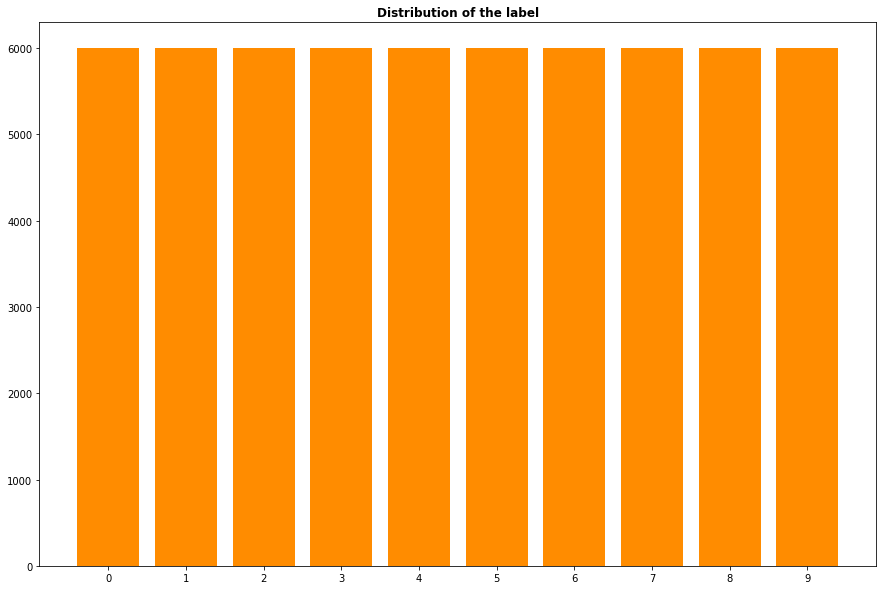

In [118]:
# PLOT THE DISTRIBUTION OF THE TARGET VARIABLE
plt.figure(figsize=(15,10))
plt.bar(numbers, frequencies, align="center", color="darkorange")
plt.xticks([i for i in range(np.min(numbers),np.max(numbers)+1)])
plt.title("Distribution of the label", weight="semibold");

<div class='alert alert-success'>
The distribution is uniform! That can be a problem for our Naive Bayes implementation, expecting a Gaussian distribution.
</div>

# 1. Naive Bayes Classifier

<div class='alert alert-info'>
Naive Bayes Classifier explanation here...
</div>

In [179]:
class NBC:
    
    #### CONSTRUCTOR ########################################
    #########################################################
    
    
    ### PRIVATE METHODS #####################################
    # PROBABILITY DENSITY FUNCTION: P
    def _pdf(self, x, mean, variance):
        
        # Use the Gaussian probability density function
        return norm(mean, variance).pdf(x)
    
    
    # PRIORS: P(C)
    def _prior(self):
        
        # Set a probability for each class: a dictionary of all P(Ci)
        self.priors = {}
        for k, v in self.labelDistribution.items():
            self.priors[k] = v / self.trainSize
    
    
    # LIKELIHOODS: P(X|C)
    def _likelihood(self):
        
        # Compute means and variances
        self.means = self.train.groupby("label").mean()
        self.vars = self.train.groupby("label").var()
    #########################################################   
    
    
    ### PUBLIC METHODS ######################################
    # TRAIN - LIKELIHOOD and PRIOR
    def fit(self, train):
        
        # Datasets
        self.train = train
        self.trainSize = train.shape[0]
        
        # Compute the distribution of the label
        self.labelDistribution = train["label"].value_counts().to_dict()
        self.classes = list(self.labelDistribution.keys())
        self.attributes = list(train.drop(columns=["label"]).columns.values)
        
        # Adjust classes
        self.classes.sort()
        
        # Compute priors and likelihoods
        self._prior()
        self._likelihood()
    
    
    # TEST - POSTERIOR: P(C|X)
    def predict(self, test):
        
        # Declare predictions array
        predictions = []
        
        # For each unknown sample
        for index, r in test.iterrows():
            
            # Init posterior array
            posterior = [1 for i in range(0, len(self.classes))]
            
            # For each class and each attribute
            for c in self.classes:
                for a in self.attributes:
                
                    # Iterative multiplication for likelihood
                    posterior[c] *= self._pdf(r[a], self.means.loc[c][a], self.vars.loc[c][a])
                
                # Multiply prior
                posterior[c] *= self.priors[c]
            
            # Select the maximum
            pred = np.argmax(posterior)
            
            # Append in the predictions array
            predictions.append(pred)
        
        return np.array(predictions)
    #########################################################

In [180]:
nbc = NBC()
nbc.fit(mnistTrain)
predictions = nbc.predict(mnistTest)
print(predictions)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1652: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1652: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


KeyboardInterrupt: 

In [90]:
norm(0,1).pdf(0)

0.3989422804014327

In [113]:
for row in mnistTrain.groupby("label").mean():
    print(row)

pixel1
pixel2
pixel3
pixel4
pixel5
pixel6
pixel7
pixel8
pixel9
pixel10
pixel11
pixel12
pixel13
pixel14
pixel15
pixel16
pixel17
pixel18
pixel19
pixel20
pixel21
pixel22
pixel23
pixel24
pixel25
pixel26
pixel27
pixel28
pixel29
pixel30
pixel31
pixel32
pixel33
pixel34
pixel35
pixel36
pixel37
pixel38
pixel39
pixel40
pixel41
pixel42
pixel43
pixel44
pixel45
pixel46
pixel47
pixel48
pixel49
pixel50
pixel51
pixel52
pixel53
pixel54
pixel55
pixel56
pixel57
pixel58
pixel59
pixel60
pixel61
pixel62
pixel63
pixel64
pixel65
pixel66
pixel67
pixel68
pixel69
pixel70
pixel71
pixel72
pixel73
pixel74
pixel75
pixel76
pixel77
pixel78
pixel79
pixel80
pixel81
pixel82
pixel83
pixel84
pixel85
pixel86
pixel87
pixel88
pixel89
pixel90
pixel91
pixel92
pixel93
pixel94
pixel95
pixel96
pixel97
pixel98
pixel99
pixel100
pixel101
pixel102
pixel103
pixel104
pixel105
pixel106
pixel107
pixel108
pixel109
pixel110
pixel111
pixel112
pixel113
pixel114
pixel115
pixel116
pixel117
pixel118
pixel119
pixel120
pixel121
pixel122
pixel123
p

In [111]:
mnistTrain.groupby("label").mean()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,,,,,,,,,,,,,,,,,,,,,
0,0.001333,0.015833,0.143833,0.332667,0.455333,0.726000,1.637167,5.436333,15.324167,33.075833,...,90.588000,79.917167,62.994833,26.558000,6.607333,1.867833,0.763500,0.321000,0.121833,0.040667
1,0.000000,0.000333,0.000667,0.006500,0.172667,0.406500,1.090000,3.026167,8.606000,32.972167,...,63.253333,19.065167,6.441167,2.780333,1.641333,0.832167,0.243333,0.104500,0.043667,0.000667
2,0.000000,0.006167,0.039667,0.105500,0.275333,0.465167,1.033667,3.705167,11.287500,28.783833,...,19.018500,16.939667,16.699000,45.211167,82.368833,69.654000,31.606833,7.551667,1.175667,0.093167
3,0.002667,0.002667,0.003500,0.005833,0.129500,0.359500,0.920000,2.021167,5.126167,21.647833,...,67.422000,36.052667,13.772333,4.007333,1.265667,0.417667,0.095500,0.031167,0.007833,0.011333
4,0.000667,0.000667,0.007667,0.023500,0.120333,0.152500,0.279500,0.636833,1.468833,4.427667,...,27.376667,17.024667,11.363667,42.671333,70.255667,55.235833,21.943667,3.475167,0.527500,0.025167
5,0.000000,0.000000,0.000000,0.000000,0.002667,0.002667,0.003000,0.004667,0.026500,0.043167,...,0.364500,0.394500,0.647833,1.520500,2.576667,2.821500,3.420500,3.696167,1.635667,0.053833
6,0.003333,0.010167,0.085833,0.307833,0.810833,1.201500,2.115667,5.936000,13.631500,22.310667,...,41.194500,27.559833,19.144833,22.964333,33.778500,25.918500,12.367667,2.604833,0.558333,0.063333
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011333,0.010000,0.010833,0.011500,0.013167,0.011833,0.013500,0.018667,0.019667,0.000000
8,0.001000,0.015667,0.062167,0.227500,0.503000,0.790667,0.968000,1.205833,1.337000,1.595333,...,36.560667,35.025333,32.409333,28.353667,22.084000,14.023000,7.602167,4.327000,1.766667,0.209167


In [102]:
for k,v in mnistTrain["label"].value_counts().iteritems():
    print(k,v)

9 6000
8 6000
7 6000
6 6000
5 6000
4 6000
3 6000
2 6000
1 6000
0 6000
